In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
!pip install mlxtend

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import GridSearchCV

In [6]:
mrkt_spend = pd.read_csv("C://Users//HP//Downloads//14. Capstone Case Study - Finding-Marketing-Insights_//Datasets//Marketing_Spend.csv")

In [7]:
mrkt_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [13]:
# Assuming marketing_spend is your DataFrame  
mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'], format='mixed', dayfirst=False).dt.strftime('%Y-%m-%d')

In [14]:
mrkt_spend['Date']

0      2019-01-01
1      2019-02-01
2      2019-03-01
3      2019-04-01
4      2019-05-01
          ...    
360    2019-12-27
361    2019-12-28
362    2019-12-29
363    2019-12-30
364    2019-12-31
Name: Date, Length: 365, dtype: object

In [15]:
mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'])

In [16]:
mrkt_spend['Date']

0     2019-01-01
1     2019-02-01
2     2019-03-01
3     2019-04-01
4     2019-05-01
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [17]:
tax_amt = pd.read_csv("C://Users//HP//Downloads//14. Capstone Case Study - Finding-Marketing-Insights_//Datasets//Tax_amount.csv")

In [18]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


In [19]:
discount_coup = pd.read_csv("C://Users//HP//Downloads//14. Capstone Case Study - Finding-Marketing-Insights_//Datasets//Discount_Coupon.csv")

In [20]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [21]:
online_sales = pd.read_csv("C://Users//HP//Downloads//14. Capstone Case Study - Finding-Marketing-Insights_//Datasets//Online_Sales.csv")

In [22]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [23]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'], format='%Y%m%d')

In [24]:
online_sales['Transaction_Date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
52919   2019-12-31
52920   2019-12-31
52921   2019-12-31
52922   2019-12-31
52923   2019-12-31
Name: Transaction_Date, Length: 52924, dtype: datetime64[ns]

In [25]:
customer_data = pd.read_csv("C://Users//HP//Downloads//14. Capstone Case Study - Finding-Marketing-Insights_//Datasets//CustomersData.csv")

In [26]:
customer_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [27]:
# Merging datasets 
merged_data1 =   pd.merge(online_sales, customer_data, on='CustomerID', how='left')

In [28]:
merged_data1['Transaction_Month'] = pd.to_datetime(merged_data1['Transaction_Date']).dt.strftime('%b')

In [29]:
merged_data2 = pd.merge(merged_data1, discount_coup, left_on=['Product_Category', 'Transaction_Month'], right_on = ['Product_Category ', 'Month'])

In [31]:
merged_data3 = pd.merge(merged_data2, mrkt_spend, left_on='Transaction_Date', right_on='Date', how='left')

In [32]:
sales_df = pd.merge(merged_data3, tax_amt, on='Product_Category', how='left')

In [33]:
sales_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Tenure_Months,Transaction_Month,Month,Product_Category,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,Jan,Jan,Nest-USA,ELEC10,10,2019-01-01,4500,2424.5,10%
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,12,Jan,Jan,Nest-USA,ELEC10,10,2019-01-01,4500,2424.5,10%
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,12,Jan,Jan,Office,OFF10,10,2019-01-01,4500,2424.5,10%
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,12,Jan,Jan,Apparel,SALE10,10,2019-01-01,4500,2424.5,18%
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,12,Jan,Jan,Bags,AIO10,10,2019-01-01,4500,2424.5,18%


In [34]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Gender               52524 non-null  object        
 11  Location             52524 non-null  object        
 12  Tenure_Months        52524 non-null  int64         
 13  Transaction_Month    52524 non-

In [35]:
sales_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_Month', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'GST'],
      dtype='object')

In [36]:
sales_df.drop(columns = ['Date', 'Month','Product_Category '], inplace = True)

In [37]:
sales_df['GST'] = sales_df['GST'].str.replace('%', '', regex=False)  # Remove '%' sign  
sales_df['GST'] = pd.to_numeric(sales_df['GST'], errors='coerce')  # Convert to numeric  
sales_df['GST'] = sales_df['GST'].astype(int)

In [38]:
sales_df['GST']

0        10
1        10
2        10
3        18
4        18
         ..
52519    10
52520    18
52521    10
52522    10
52523    10
Name: GST, Length: 52524, dtype: int32

**1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level**

In [39]:
# Formula for invoice values
sales_df['Invoice_Value'] = ((sales_df['Quantity'] * sales_df['Avg_Price']) * 
                               (1 - sales_df['Discount_pct']/100) * 
                               (1 + sales_df['GST']/100)) + sales_df['Delivery_Charges']

In [40]:
sales_df['Invoice_Value']

0        158.67290
1        158.67290
2          8.52950
3         99.58430
4         24.02300
           ...    
52519     99.90100
52520     46.90792
52521    123.44760
52522    316.50200
52523    267.99160
Name: Invoice_Value, Length: 52524, dtype: float64

In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Gender               52524 non-null  object        
 11  Location             52524 non-null  object        
 12  Tenure_Months        52524 non-null  int64         
 13  Transaction_Month    52524 non-

**2.Detailed exploratory analysis**

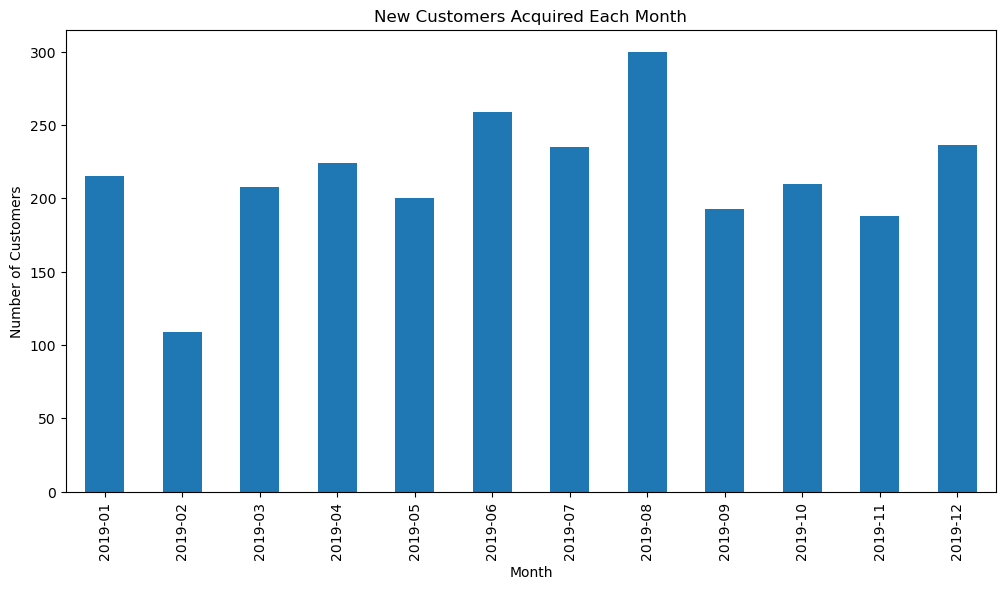

In [42]:
# a. How many customers acquired every month?

monthly_customers = sales_df.groupby(sales_df['Transaction_Date'].dt.to_period('M'))['CustomerID'].nunique()  
monthly_customers.plot(kind='bar', figsize=(12, 6), title='New Customers Acquired Each Month', xlabel='Month', ylabel='Number of Customers')  
plt.show()

In [46]:
# b. Customer Retention Month on Month

retention = sales_df.groupby(sales_df['Transaction_Date'].dt.to_period('M'))['CustomerID'].nunique()  

In [47]:
retention_df = pd.DataFrame({'New_Customers': monthly_customers}) 

In [48]:
retention_df['Retained_Customers'] = retention_df['New_Customers'].shift()  

In [49]:
retention_df.index = retention_df.index.to_timestamp() 

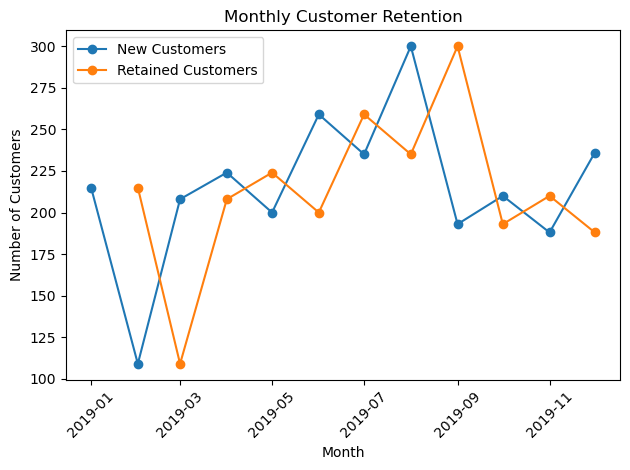

In [50]:
# Plotting the Customer Retention Month on Month  
plt.plot(retention_df.index, retention_df['New_Customers'], label='New Customers', marker='o')  
plt.plot(retention_df.index, retention_df['Retained_Customers'], label='Retained Customers', marker='o')  
plt.title('Monthly Customer Retention')  
plt.xlabel('Month')  
plt.ylabel('Number of Customers')  
plt.legend()  
plt.xticks(rotation=45)    
plt.tight_layout()   
plt.show()  

In [56]:
# c. Revenues from Existing/New Customers Month on Month

sales_df['Month'] = sales_df['Transaction_Date'].dt.to_period('M')  

In [59]:
# Aggregate monthly revenues by customer type  
def categorize_customers(month):  
    monthly_data = sales_df[sales_df['Month'] == month]  
    new_customers = monthly_data[~monthly_data['CustomerID'].isin(sales_df[sales_df['Month'] < month]['CustomerID'])]  
    existing_customers = monthly_data[monthly_data['CustomerID'].isin(sales_df[sales_df['Month'] < month]['CustomerID'])]  

    return pd.Series({  
        'New_Customer_Revenue': new_customers['Invoice_Value'].sum(),  
        'Existing_Customer_Revenue': existing_customers['Invoice_Value'].sum()  
    })  


In [60]:
# Apply the function to each unique month  
monthly_revenue = sales_df['Month'].unique()  
revenue_by_month = pd.DataFrame({month: categorize_customers(month) for month in monthly_revenue}).T  

In [61]:
# Make sure the index is a period for proper plotting  
revenue_by_month.index = revenue_by_month.index.astype(str) 

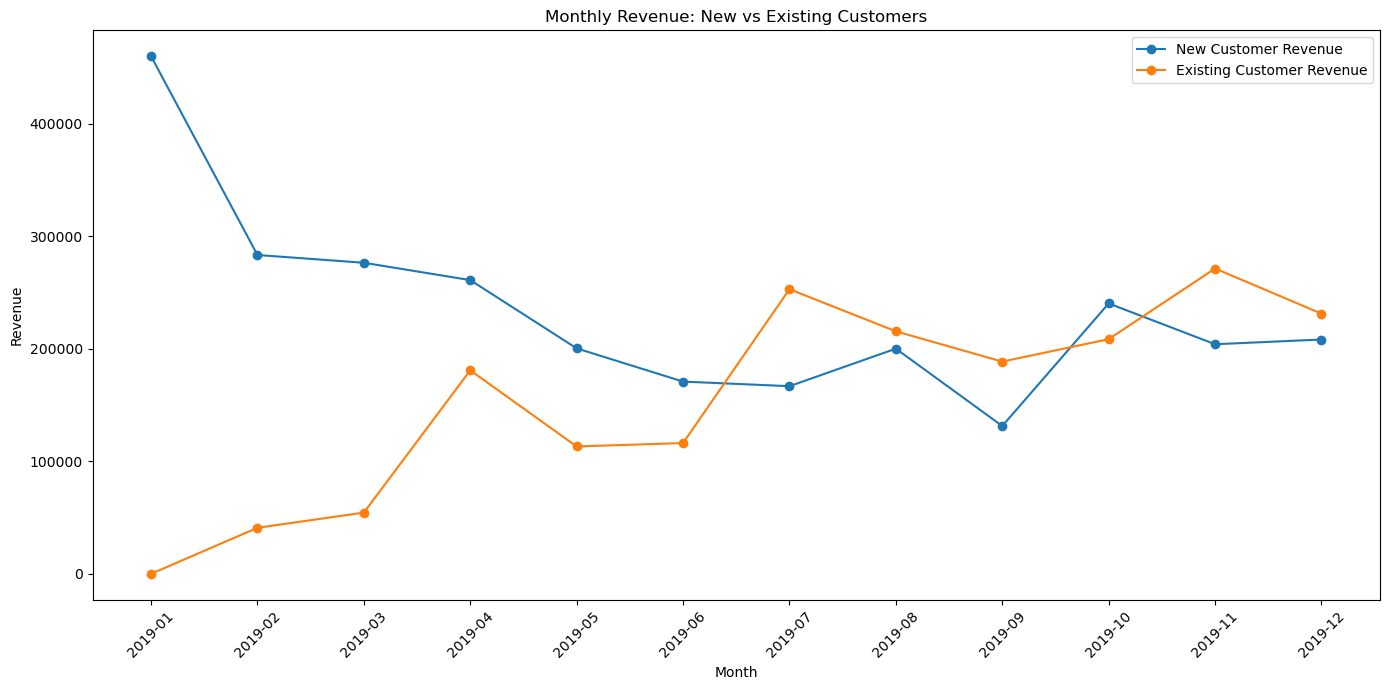

In [62]:
# Plotting the monthly revenue for new vs existing customers  
plt.figure(figsize=(14, 7))  
plt.plot(revenue_by_month.index, revenue_by_month['New_Customer_Revenue'], label='New Customer Revenue', marker='o')  
plt.plot(revenue_by_month.index, revenue_by_month['Existing_Customer_Revenue'], label='Existing Customer Revenue', marker='o')  
plt.title('Monthly Revenue: New vs Existing Customers')  
plt.xlabel('Month')  
plt.ylabel('Revenue')  
plt.legend()  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


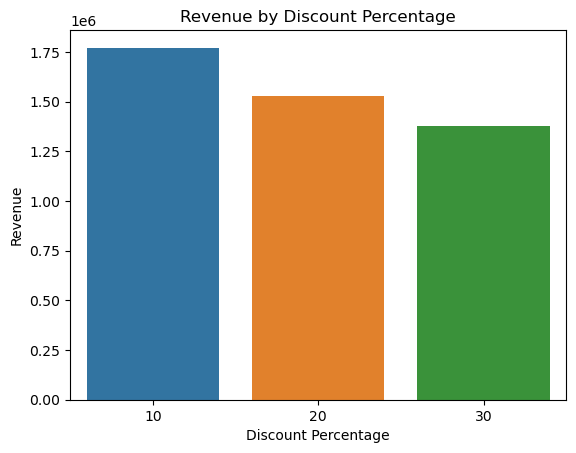

In [63]:
# d. Role of Discounts in Revenues

discount_revenue = sales_df.groupby('Discount_pct')['Invoice_Value'].sum().reset_index()  

sns.barplot(x='Discount_pct', y='Invoice_Value', data=discount_revenue)  
plt.title('Revenue by Discount Percentage')  
plt.xlabel('Discount Percentage')  
plt.ylabel('Revenue')  
plt.show()

In [77]:
# e. KPI Analysis by Category/Month/Week/Day
# Adding 'Year' and 'Week' columns for analysis  
sales_df['Year'] = sales_df['Transaction_Date'].dt.year  
sales_df['Week'] = sales_df['Transaction_Date'].dt.isocalendar().week  

In [78]:
# 1. Calculate KPIs  
# Total Revenue  
total_revenue = sales_df['Invoice_Value'].sum()  
print(f'Total Revenue: ${total_revenue:,.2f}') 

Total Revenue: $4,677,562.22


In [79]:
# Total number of orders  
total_orders = sales_df['Transaction_ID'].nunique()  
print(f'Total Orders: {total_orders}')

Total Orders: 25000


In [80]:
# Average Order Value  
average_order_value = total_revenue / total_orders  
print(f'Average Order Value: ${average_order_value:,.2f}') 

Average Order Value: $187.10


In [82]:
# Total Quantity Sold  
total_quantity = sales_df['Quantity'].sum()  
print(f'Total Quantity Sold: {total_quantity}') 

Total Quantity Sold: 236367


In [83]:
# Number of Customers (Existing/New)  
total_customers = sales_df['CustomerID'].nunique()  
new_customers = sales_df[sales_df['New_Customer'] == True]['CustomerID'].nunique()  
print(f'Total Customers: {total_customers}, New Customers: {new_customers}')  

Total Customers: 1468, New Customers: 0


In [84]:
# 2. Analyze by Category  
category_analysis = sales_df.groupby('Product_Category').agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum'),  
    Customers=('CustomerID', 'nunique')  
).reset_index().sort_values(by='Revenue', ascending=False) 

In [85]:
print(category_analysis)

        Product_Category       Revenue  Orders  Quantity  Customers
12              Nest-USA  2.351316e+06   11626     21430       1260
2                Apparel  7.354504e+05    8129     32438       1323
10                  Nest  4.399770e+05    1974      2837        516
14                Office  3.440001e+05    3526     88383       1103
5              Drinkware  2.402678e+05    2524     30501        919
3                   Bags  1.688531e+05    1545     15273        728
9              Lifestyle  1.145590e+05    1712     24881        817
13  Notebooks & Journals  1.093681e+05     620      9556        383
11           Nest-Canada  6.554575e+04     258       469        205
7               Headgear  5.345419e+04     674      3533        425
6             Gift Cards  1.757481e+04     157       206         77
15                  Waze  1.125057e+04     442      1144        309
4                Bottles  9.309917e+03     258      2090        203
0            Accessories  9.277126e+03     191  

In [86]:
# 3. Analyze Monthly Trends  
monthly_analysis = sales_df.groupby('Month').agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum'),  
    Customers=('CustomerID', 'nunique')  
).reset_index() 

In [90]:
monthly_analysis['Month'] = monthly_analysis['Month'].astype(str) 

In [91]:
print(monthly_analysis)

      Month       Revenue  Orders  Quantity  Customers
0   2019-01  460087.03245    2096     19987        215
1   2019-02  324330.66720    1658     16410        109
2   2019-03  330923.97143    1982     20543        208
3   2019-04  441974.38503    1806     24922        224
4   2019-05  313637.96936    2019     18519        200
5   2019-06  287125.25071    1934     21482        259
6   2019-07  419784.20761    2079     22613        235
7   2019-08  415699.17184    2411     27379        300
8   2019-09  320048.22198    1929     19329        193
9   2019-10  448939.11355    2123     17400        210
10  2019-11  475482.19736    2279     15116        188
11  2019-12  439530.03015    2684     12667        236


C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

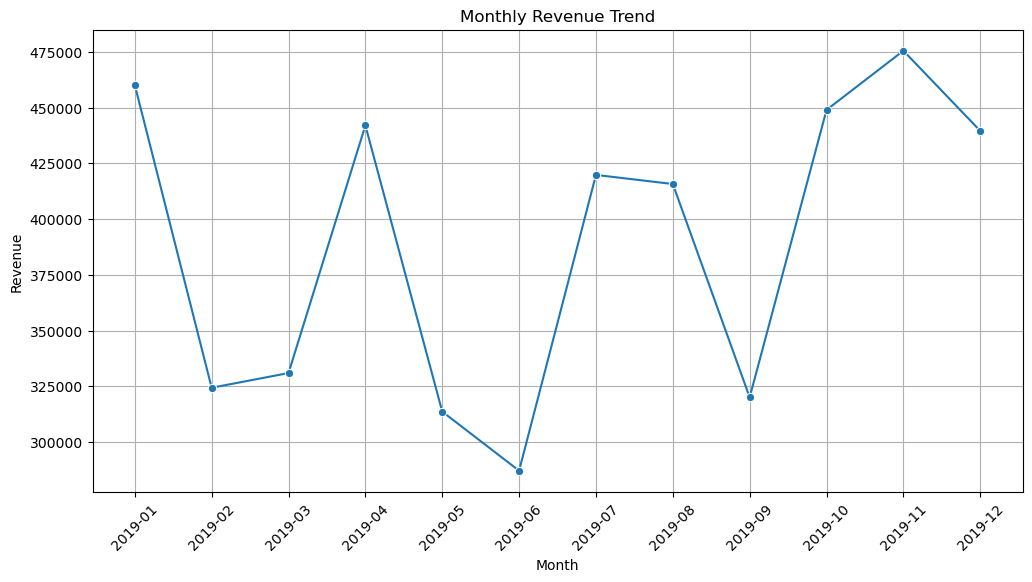

In [92]:
# Visualize Monthly Revenue Trend  
plt.figure(figsize=(12, 6))  
sns.lineplot(data=monthly_analysis, x='Month', y='Revenue', marker='o')  
plt.title('Monthly Revenue Trend')  
plt.xticks(rotation=45)  
plt.xlabel('Month')  
plt.ylabel('Revenue')  
plt.grid()  
plt.show()  

In [93]:
# 4. Weekly Analysis  
weekly_analysis = sales_df.groupby(['Year', 'Week']).agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum')  
).reset_index()

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

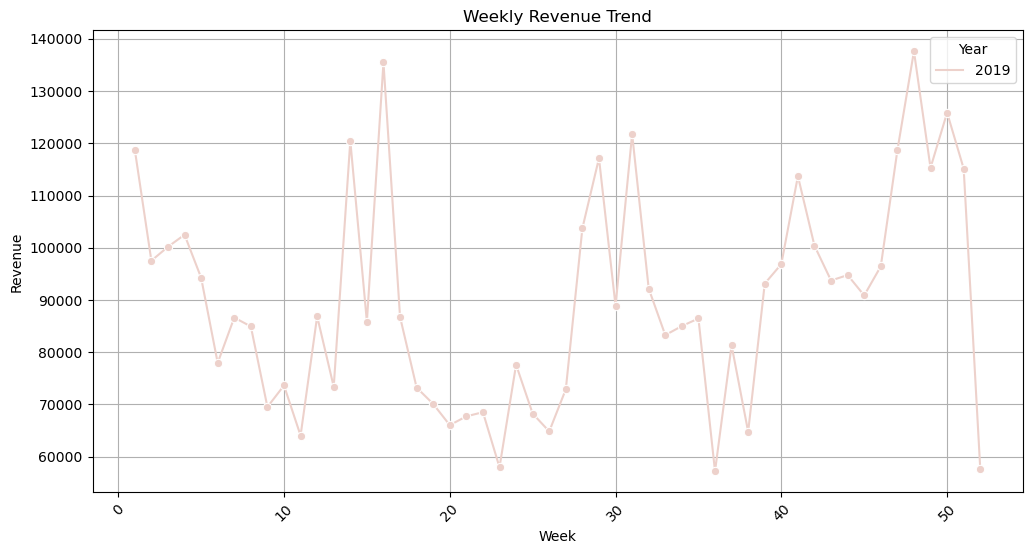

In [94]:
# Visualize Weekly Revenue Trend  
plt.figure(figsize=(12, 6))  
sns.lineplot(data=weekly_analysis, x='Week', y='Revenue', hue='Year', marker='o')  
plt.title('Weekly Revenue Trend')  
plt.xticks(rotation=45)  
plt.xlabel('Week')  
plt.ylabel('Revenue')  
plt.grid()  
plt.show()  

In [95]:
# 5. Daily Analysis  
daily_analysis = sales_df.groupby(sales_df['Transaction_Date'].dt.date).agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum'),  
    Customers=('CustomerID', 'nunique')  
).reset_index() 

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

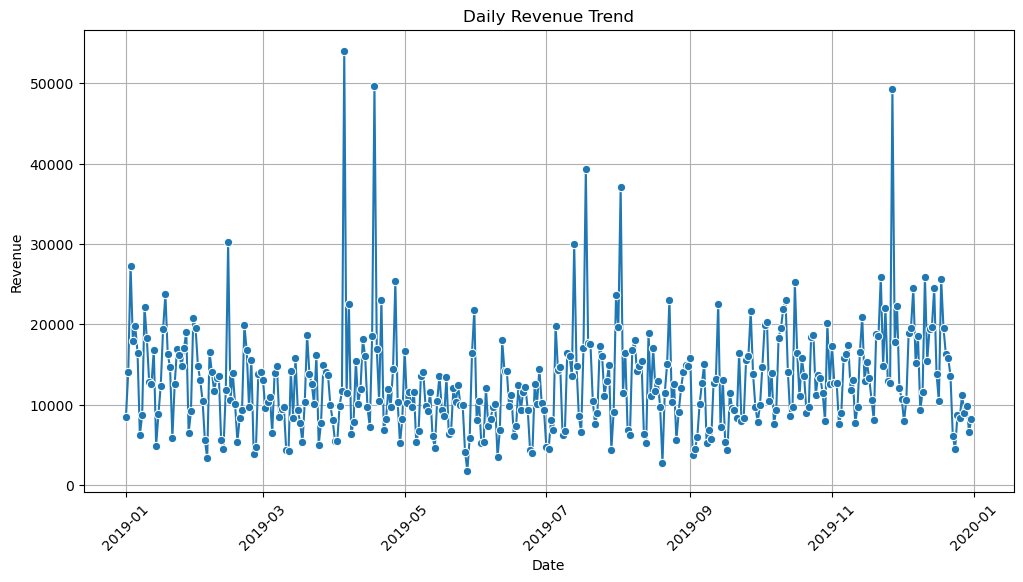

In [96]:
# Visualize Daily Revenue Trend  
plt.figure(figsize=(12, 6))  
sns.lineplot(data=daily_analysis, x='Transaction_Date', y='Revenue', marker='o')  
plt.title('Daily Revenue Trend')  
plt.xticks(rotation=45)  
plt.xlabel('Date')  
plt.ylabel('Revenue')  
plt.grid()  
plt.show()  

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

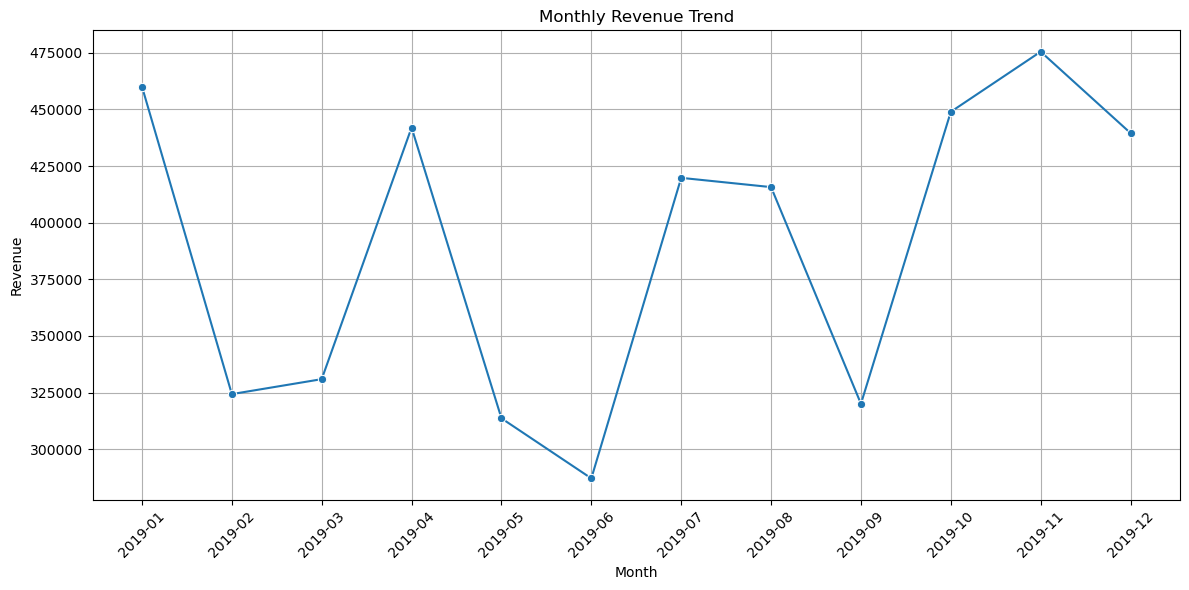

In [97]:
# f. Understand the trends/seasonality of sales by category, location, month etc…

# Trends by month
plt.figure(figsize=(12, 6))  

# Plotting monthly revenue trend  
sns.lineplot(data=monthly_analysis, x='Month', y='Revenue', marker='o')  
plt.title('Monthly Revenue Trend')  
plt.xticks(rotation=45)  
plt.xlabel('Month')  
plt.ylabel('Revenue')  
plt.grid()  
plt.tight_layout()  
plt.show()  

In [99]:
# Trends by category 
# Monthly Analysis by Category  
category_monthly_analysis = sales_df.groupby(['Month', 'Product_Category']).agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum')  
).reset_index()  
  

In [100]:
print(category_monthly_analysis)

       Month      Product_Category       Revenue  Orders  Quantity
0    2019-01           Accessories      57.55430       1         1
1    2019-01               Android      99.49760       4         4
2    2019-01               Apparel   56205.71394     471      1500
3    2019-01                  Bags   14642.22506     118       860
4    2019-01               Bottles    1048.12850      15       185
..       ...                   ...           ...     ...       ...
168  2019-12           Nest-Canada    4300.49330      23        34
169  2019-12              Nest-USA  227924.61240    1314      2289
170  2019-12  Notebooks & Journals     789.61960       9        55
171  2019-12                Office   17964.78120     238      4858
172  2019-12                  Waze     967.16804      46       104

[173 rows x 5 columns]


In [104]:
# Trends by location

# Monthly Analysis by Location  
location_monthly_analysis = sales_df.groupby(['Month', 'Location']).agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Orders=('Transaction_ID', 'nunique'),  
    Quantity=('Quantity', 'sum')  
).reset_index()  

In [114]:
location_monthly_analysis.head()

,Month,Location,Revenue,Orders,Quantity
0,2019-01,California,173970.38109,781,8782
1,2019-01,Chicago,122376.49878,622,3612
2,2019-01,New Jersey,35208.02548,172,1877
3,2019-01,New York,90097.76017,407,4266
4,2019-01,Washington DC,38434.36693,205,1450


In [108]:
print(location_monthly_analysis.dtypes)

Month       period[M]
Location       object
Revenue       float64
Orders          int64
Quantity        int64
dtype: object


In [112]:
# Convert Period to string format  
location_monthly_analysis['Month'] = location_monthly_analysis['Month'].astype(str)

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.

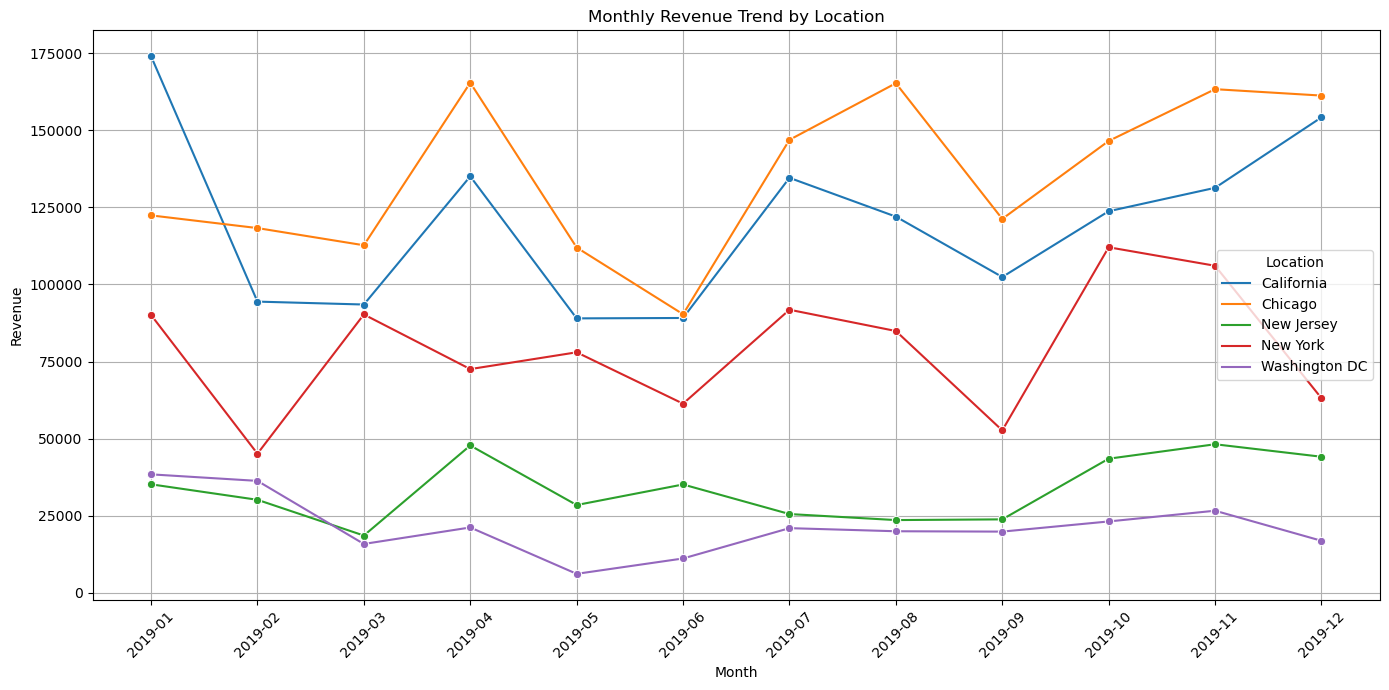

In [113]:
import seaborn as sns  

# Trend Plot by Location  
plt.figure(figsize=(14, 7))  
sns.lineplot(data=location_monthly_analysis, x='Month', y='Revenue', hue='Location', marker='o')  
plt.title('Monthly Revenue Trend by Location')  
plt.xticks(rotation=45)  
plt.xlabel('Month')  
plt.ylabel('Revenue')  
plt.legend(title='Location')  
plt.grid()  
plt.tight_layout()  
plt.show()  

In [118]:
# g. How number order varies and sales with different days?

# Group by Transaction_Date and calculate total sales (Invoice_Value) and total transactions (Transaction_ID count)  
daily_sales = sales_df.groupby('Transaction_Date').agg({  
    'Invoice_Value': 'sum',  
    'Transaction_ID': 'count'  
}).reset_index()  


In [119]:
# Rename the columns for clarity  
daily_sales.columns = ['Transaction_Date', 'Total_Sales_Value', 'Total_Transactions']  

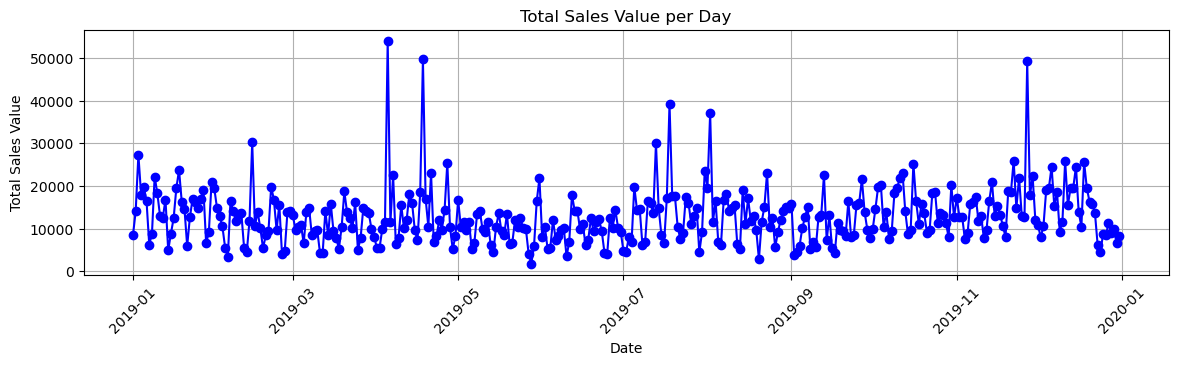

In [120]:
# Plotting the results  
plt.figure(figsize=(14, 7))  

# Plot total sales value per day  
plt.subplot(2, 1, 1)  
plt.plot(daily_sales['Transaction_Date'], daily_sales['Total_Sales_Value'], marker='o', color='b')  
plt.title('Total Sales Value per Day')  
plt.xlabel('Date')  
plt.ylabel('Total Sales Value')  
plt.xticks(rotation=45)  
plt.grid()  

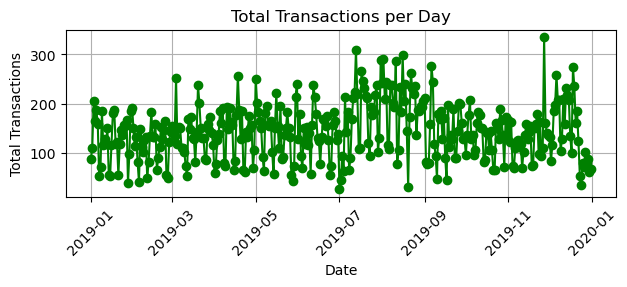

In [121]:
# Plot total transactions per day  
plt.subplot(2, 1, 2)  
plt.plot(daily_sales['Transaction_Date'], daily_sales['Total_Transactions'], marker='o', color='g')  
plt.title('Total Transactions per Day')  
plt.xlabel('Date')  
plt.ylabel('Total Transactions')  
plt.xticks(rotation=45)  
plt.grid()  

plt.tight_layout()  
plt.show()  

In [123]:
# Grouping by the 'Month' column to calculate the required metrics  
monthly_data = sales_df.groupby('Month').agg(  
    Revenue=('Invoice_Value', 'sum'),  
    Marketing_Spend=('Offline_Spend', 'sum'),  
    Tax=('GST', 'sum'),  
    Delivery_Charges=('Delivery_Charges', 'sum')  
).reset_index()  

In [124]:
# Calculate total marketing spend (assuming both offline and online contribute)  
monthly_data['Marketing_Spend'] += sales_df.groupby('Month')['Online_Spend'].sum().values  

# Calculate percentage of marketing spend out of revenue  
monthly_data['Percentage_Marketing_Spend'] = (monthly_data['Marketing_Spend'] / monthly_data['Revenue']) * 100  

# Calculate percentage of delivery charges out of revenue  
monthly_data['Percentage_Delivery_Charges'] = (monthly_data['Delivery_Charges'] / monthly_data['Revenue']) * 100 

In [125]:
print(monthly_data)  

      Month       Revenue  Marketing_Spend    Tax  Delivery_Charges  \
0   2019-01  460087.03245      14967655.79  52978          58401.75   
1   2019-02  324330.66720      15965228.59  44166          48454.28   
2   2019-03  330923.97143      16596839.96  60785          59324.29   
3   2019-04  441974.38503      21512428.63  58388          40929.78   
4   2019-05  313637.96936      18433695.89  65471          40745.99   
5   2019-06  287125.25071      19525801.91  59569          37055.84   
6   2019-07  419784.20761      22483223.92  75241          48024.13   
7   2019-08  415699.17184      30119762.77  90793          60595.00   
8   2019-09  320048.22198      21453198.09  59484          40762.06   
9   2019-10  448939.11355      20890366.33  54016          45826.81   
10  2019-11  475482.19736      20789194.86  46076          32287.93   
11  2019-12  439530.03015      27728302.65  54888          37881.99   

    Percentage_Marketing_Spend  Percentage_Delivery_Charges  
0             

In [131]:
# h. How marketing spend is impacting on revenue
correlation = monthly_data[['Revenue', 'Marketing_Spend', 'Tax', 'Delivery_Charges', 'Percentage_Marketing_Spend', 'Percentage_Delivery_Charges']].corr()  
print("Correlation matrix:")  
print(correlation)

Correlation matrix:
                              Revenue  Marketing_Spend       Tax  \
Revenue                      1.000000         0.325416 -0.049263   
Marketing_Spend              0.325416         1.000000  0.603075   
Tax                         -0.049263         0.603075  1.000000   
Delivery_Charges             0.027701        -0.086393  0.446370   
Percentage_Marketing_Spend  -0.496868         0.649055  0.581911   
Percentage_Delivery_Charges -0.663383        -0.323173  0.313072   

                             Delivery_Charges  Percentage_Marketing_Spend  \
Revenue                              0.027701                   -0.496868   
Marketing_Spend                     -0.086393                    0.649055   
Tax                                  0.446370                    0.581911   
Delivery_Charges                     1.000000                   -0.151967   
Percentage_Marketing_Spend          -0.151967                    1.000000   
Percentage_Delivery_Charges          0.72

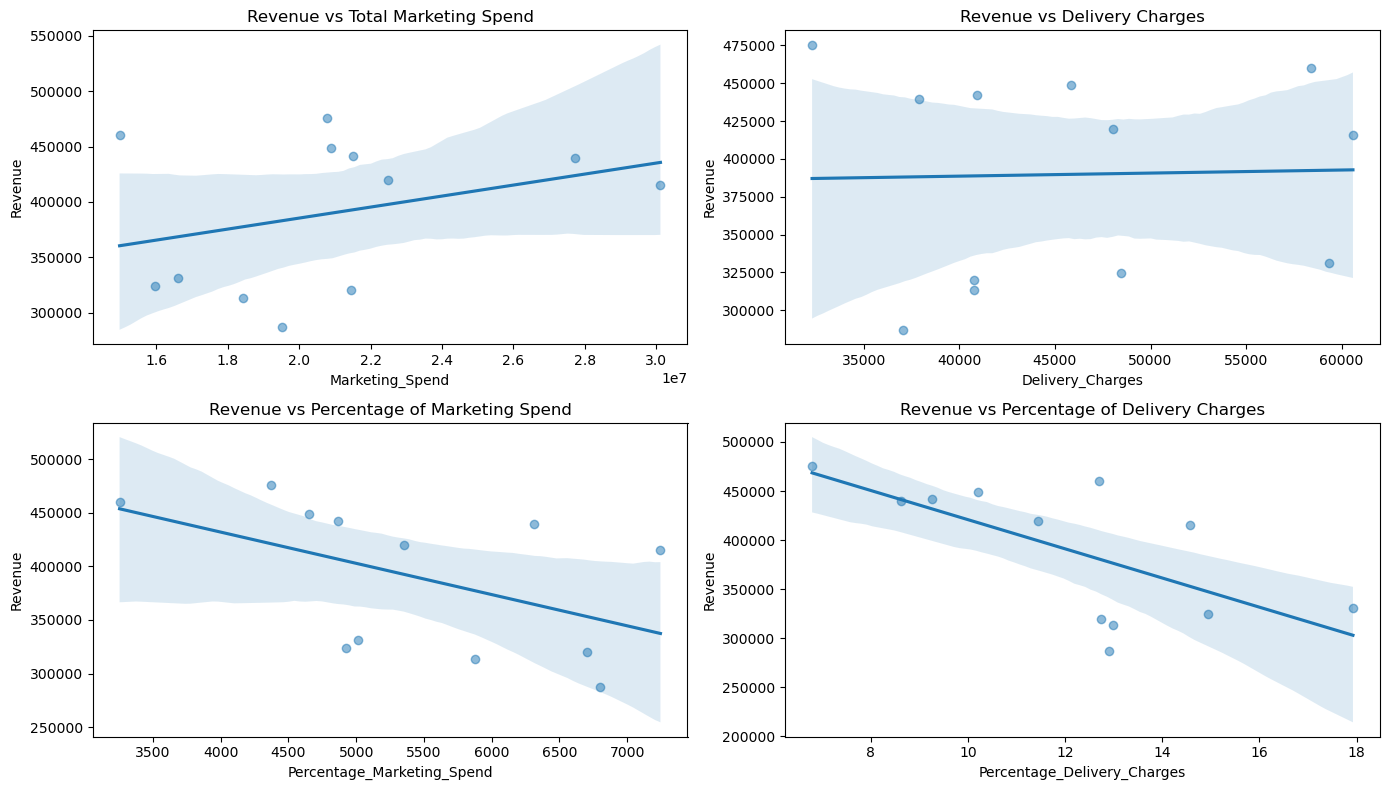

In [136]:
plt.figure(figsize=(14, 8))  

# Plot Revenue vs Marketing Spend  
plt.subplot(2, 2, 1)  
sns.regplot(data=monthly_data, x='Marketing_Spend', y='Revenue', scatter_kws={"alpha":0.5})  
plt.title('Revenue vs Total Marketing Spend')  

# Plot Revenue vs Delivery Charges  
plt.subplot(2, 2, 2)  
sns.regplot(data=monthly_data, x='Delivery_Charges', y='Revenue', scatter_kws={"alpha":0.5})  
plt.title('Revenue vs Delivery Charges')  

# Plot Percentage Marketing Spend vs Revenue  
plt.subplot(2, 2, 3)  
sns.regplot(data=monthly_data, x='Percentage_Marketing_Spend', y='Revenue', scatter_kws={"alpha":0.5})  
plt.title('Revenue vs Percentage of Marketing Spend')  

# Plot Percentage Delivery Charges vs Revenue  
plt.subplot(2, 2, 4)  
sns.regplot(data=monthly_data, x='Percentage_Delivery_Charges', y='Revenue', scatter_kws={"alpha":0.5})  
plt.title('Revenue vs Percentage of Delivery Charges')  

plt.tight_layout()  
plt.show()  

In [137]:
import statsmodels.api as sm  
# Set the dependent and independent variables 
X = monthly_data[['Marketing_Spend', 'Delivery_Charges', 'Percentage_Marketing_Spend', 'Percentage_Delivery_Charges']]  
y = monthly_data['Revenue']  

In [138]:
# Add a constant to the model  
X = sm.add_constant(X) 

In [139]:
# Fit the model  
model = sm.OLS(y, X).fit()  

In [140]:
# Print the summary  
print("Regression Analysis Summary:")  
print(model.summary())  

Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     296.3
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           6.95e-08
Time:                        13:45:30   Log-Likelihood:                -119.28
No. Observations:                  12   AIC:                             248.6
Df Residuals:                       7   BIC:                             251.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

C:\Users\HP\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [143]:
# i. Which product was appeared in the transactions?
unique_products = sales_df['Product_Category'].unique()  
print("Unique Products in Transactions:")  
print(unique_products)  

Unique Products in Transactions:
['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle'
 'Notebooks & Journals' 'Headgear' 'Waze' 'Nest-Canada' 'Bottles'
 'Gift Cards' 'Housewares' 'Android' 'Accessories' 'Nest']


In [149]:
# Group by products and sum their purchased quantities  
product_quantity = sales_df.groupby('Product_Category').agg(Total_Quantity=('Quantity', 'sum')).reset_index()
product_quantity.sort_values(by='Total_Quantity', ascending=False)  

,Product_Category,Total_Quantity
14,Office,88383
2,Apparel,32438
5,Drinkware,30501
9,Lifestyle,24881
12,Nest-USA,21430
3,Bags,15273
13,Notebooks & Journals,9556
7,Headgear,3533
10,Nest,2837
8,Housewares,2484


In [147]:
# j. Which product was purchased mostly based on the quantity?

most_purchased_product = product_quantity.loc[product_quantity['Total_Quantity'].idxmax()]  

print("\nMost Purchased Product Based on Quantity:")  
print(most_purchased_product) 


Most Purchased Product Based on Quantity:
Product_Category    Office
Total_Quantity       88383
Name: 14, dtype: object


**3. . Performing Customer Segmentation**

In [151]:
# Heuristic (RFM Analysis)

# Get the last transaction date  
current_date = sales_df['Transaction_Date'].max()  

In [152]:
# Calculate Recency, Frequency, and Monetary Value  
rfm_df = sales_df.groupby('CustomerID').agg({  
    'Transaction_Date': lambda x: (current_date - x.max()).days,  # Recency  
    'Transaction_ID': 'count',  # Frequency  
    'Invoice_Value': 'sum'  # Monetary value  
}).rename(columns={  
    'Transaction_Date': 'Recency',  
    'Transaction_ID': 'Frequency',  
    'Invoice_Value': 'Monetary'  
}).reset_index() 

In [153]:
# Assign RFM Score  

rfm_df['Recency_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])  # Lower days = better score  
rfm_df['Frequency_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4])  # Higher frequency = better score  
rfm_df['Monetary_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

In [154]:
# Calculate RFM Segment Score  
rfm_df['RFM_Score'] = rfm_df['Recency_Score'].astype(str) + rfm_df['Frequency_Score'].astype(str) + rfm_df['Monetary_Score'].astype(str) 

In [155]:
# Define segments  
def rfm_segment(row):  
    if row['RFM_Score'] == '444':  
        return 'Premium'  
    elif row['RFM_Score'][0] == '4':  
        return 'Gold'  
    elif row['RFM_Score'][0] in ['3', '2'] and row['Frequency'] >= 2:  
        return 'Silver'  
    else:  
        return 'Standard' 

In [156]:
# Assign segments  
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)  

In [157]:
print("Customer Segmentation (Heuristic):")  
print(rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Segment']].head()) 

Customer Segmentation (Heuristic):
   CustomerID  Recency  Frequency     Monetary Segment
0       12346      107          2    174.98174  Silver
1       12347       59         59  12059.17780  Silver
2       12348       73         23   1501.92620  Silver
3       12350       17         17   1183.71394    Gold
4       12356      107         36   1753.45086  Silver


In [158]:
# Scientific (K-Means Clustering)

from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt

In [159]:
# Standardize the RFM Data  
X = rfm_df[['Recency', 'Frequency', 'Monetary']]  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [160]:
# Apply K-Means Clustering  
 
wcss = []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(X_scaled)  
    wcss.append(kmeans.inertia_)

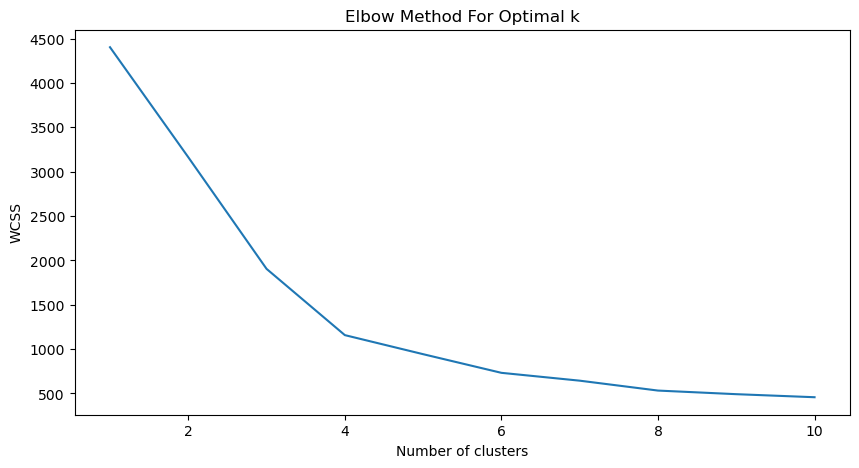

In [161]:
# Plotting elbow curve  
plt.figure(figsize=(10, 5))  
plt.plot(range(1, 11), wcss)  
plt.title('Elbow Method For Optimal k')  
plt.xlabel('Number of clusters')  
plt.ylabel('WCSS')  
plt.show()  

In [162]:
# After analyzing the elbow curve, choose an appropriate number of clusters (e.g., 4)  
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)  
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)  

In [163]:
# Analyze Cluster Profiles  
cluster_profiles = rfm_df.groupby('Cluster').agg({  
    'Recency': 'mean',  
    'Frequency': 'mean',  
    'Monetary': 'mean',  
    'CustomerID': 'count'  
}).rename(columns={'CustomerID': 'Total_Customers'}).reset_index()  

In [164]:
print("Cluster Profiles:")  
print(cluster_profiles)  

Cluster Profiles:
   Cluster     Recency   Frequency      Monetary  Total_Customers
0        0   77.182058   26.150396   2228.651244              758
1        1  254.359347   20.471869   1737.793880              551
2        2   29.200000  583.800000  61737.798218                5
3        3   84.538961  120.149351  11182.020498              154


**4.Predicting Customer Lifetime Value** 

In [165]:
# Calculate Total Revenue  
total_revenue_df = sales_df.groupby('CustomerID')['Invoice_Value'].sum().reset_index()  
total_revenue_df.rename(columns={'Invoice_Value': 'Total_Revenue'}, inplace=True)

In [166]:
# Merge with RFM DataFrame  
rfm_df = rfm_df.merge(total_revenue_df, on='CustomerID', how='left')  

In [167]:
# Define Customer Value Categories 
quantiles = rfm_df['Total_Revenue'].quantile([0, 0.33, 0.66, 1]).values  
labels = ['Low Value', 'Medium Value', 'High Value'] 

In [168]:
# Assign categories based on quantiles  
rfm_df['CLV_Category'] = pd.cut(rfm_df['Total_Revenue'], bins=quantiles, labels=labels, include_lowest=True) 

In [169]:
# Check the distribution of categories  
print(rfm_df['CLV_Category'].value_counts())  

CLV_Category
High Value      499
Low Value       485
Medium Value    484
Name: count, dtype: int64


**Performing Classifiaction Model**

In [170]:
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

In [179]:
# Prepare Features and Target  
# Select relevant features for classification  
feature_columns = ['Recency', 'Frequency', 'Monetary']    
X = rfm_df[feature_columns]  
y = rfm_df['CLV_Category'] 

In [172]:
# Split the Data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [173]:
# Train a Classification Model  
model = RandomForestClassifier(random_state=42)  
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [174]:
# Evaluate the Model  
y_pred = model.predict(X_test) 

In [175]:
print("Classification Report:")  
print(classification_report(y_test, y_pred))  

Classification Report:
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00       100
   Low Value       1.00      1.00      1.00        97
Medium Value       1.00      1.00      1.00        97

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [176]:
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[100   0   0]
 [  0  97   0]
 [  0   0  97]]


**5.Cross-Selling (Which products are selling together)**

In [182]:
basket_df = sales_df.groupby(['Transaction_ID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID')  

basket_df = (basket_df > 0).astype(int)  

basket_df.head()

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
from mlxtend.frequent_patterns import apriori, association_rules  

frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)  

rules = rules.sort_values(by='lift', ascending=False)  

rules.head()

C:\Users\HP\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


   support                              itemsets
0  0.01632  (26 oz Double Wall Insulated Bottle)
1  0.01032          (8 pc Android Sticker Sheet)
2  0.01000              (Android Rise 14 oz Mug)
3  0.01392                      (BLM Sweatshirt)
4  0.01020                        (Badge Holder)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825


In [188]:
rules = rules.sort_values('lift', ascending=False)

In [189]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825


C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


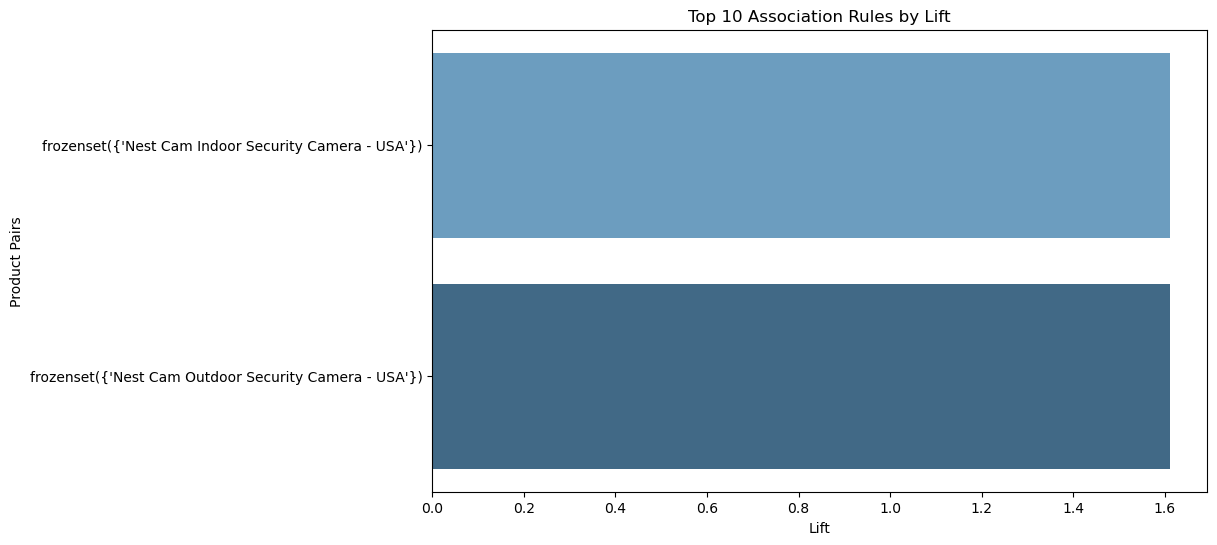

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y='antecedents', data=rules.head(10), palette='Blues_d')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Product Pairs')
plt.show()

**6. Predicting Next Purchase Day**

In [205]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51056 entries, 37745 to 41233
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 51056 non-null  int64         
 1   Transaction_ID             51056 non-null  int64         
 2   Transaction_Date           51056 non-null  datetime64[ns]
 3   Product_SKU                51056 non-null  object        
 4   Product_Description        51056 non-null  object        
 5   Product_Category           51056 non-null  object        
 6   Quantity                   51056 non-null  int64         
 7   Avg_Price                  51056 non-null  float64       
 8   Delivery_Charges           51056 non-null  float64       
 9   Coupon_Status              51056 non-null  object        
 10  Gender                     51056 non-null  object        
 11  Location                   51056 non-null  object        
 12  Tenur

In [207]:
avg_days_per_transaction = sales_df.groupby('CustomerID')['Days_Between_Transactions'].mean().reset_index()
avg_days_per_transaction.columns = ['CustomerID', 'Avg_Days_Between']

In [208]:
def assign_next_purchase_bucket(days):
    if days <= 30:
        return '0-30'
    elif days <= 60:
        return '30-60'
    elif days <= 90:
        return '60-90'
    else:
        return '90+'

avg_days_per_transaction['Next_Purchase_Bucket'] = avg_days_per_transaction['Avg_Days_Between'].apply(assign_next_purchase_bucket)

In [209]:
avg_days_per_transaction.head()

,CustomerID,Avg_Days_Between,Next_Purchase_Bucket
0,12346,0.000000,0-30
1,12347,3.844828,0-30
2,12348,5.409091,0-30
3,12350,0.000000,0-30
4,12356,0.000000,0-30


In [210]:
customer_features = sales_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (sales_df['Transaction_Date'].max() - x.max()).days,
    'Transaction_ID': 'nunique',
    'Quantity': 'sum',
    'Invoice_Value': 'mean'
}).reset_index()

In [211]:
customer_features.columns = ['CustomerID', 'Recency', 'Frequency', 'Total_Quantity', 'Avg_Order_Value']

In [213]:
customer_data = pd.merge(customer_features, avg_days_per_transaction, on='CustomerID')
customer_data.head()

,CustomerID,Recency,Frequency,Total_Quantity,Avg_Order_Value,Avg_Days_Between,Next_Purchase_Bucket
0,12346,107,1,2,83.470000,0.000000,0-30
1,12347,59,31,339,207.628716,3.844828,0-30
2,12348,73,8,199,58.614036,5.409091,0-30
3,12350,17,10,20,66.266646,0.000000,0-30
4,12356,107,12,55,49.646563,0.000000,0-30


In [214]:
X = customer_data[['Recency', 'Frequency', 'Total_Quantity', 'Avg_Order_Value']]
y = customer_data['Next_Purchase_Bucket']

In [215]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
clf = RandomForestClassifier(random_state=42)

In [217]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [218]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        0-30       0.99      1.00      0.99       415
       30-60       0.00      0.00      0.00         3
       60-90       0.00      0.00      0.00         1
         90+       0.00      0.00      0.00         2

    accuracy                           0.98       421
   macro avg       0.25      0.25      0.25       421
weighted avg       0.97      0.98      0.98       421



C:\Users\HP\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [220]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[414   1   0   0]
 [  3   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]]


In [221]:
importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

In [222]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}

In [223]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

In [224]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [225]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


**7.Perform cohort analysis by defining below cohorts**

In [253]:
# Create cohort month and the month of first purchase for each customer  
sales_df['Cohort_Month'] = sales_df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')  

In [254]:
print(sales_df[['CustomerID', 'Transaction_Date', 'Cohort_Month', 'Transaction_Month']].head())

       CustomerID Transaction_Date Cohort_Month Transaction_Month
37745       12346       2019-09-15      2019-09               Sep
10545       12347       2019-03-24      2019-03               Mar
10546       12347       2019-03-24      2019-03               Mar
10547       12347       2019-03-24      2019-03               Mar
10548       12347       2019-03-24      2019-03               Mar


In [255]:
cohort_data = sales_df.groupby(['Cohort_Month', 'Transaction_Month']).agg({ 'CustomerID': 'nunique'}).reset_index()

In [256]:
cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Transaction_Month', values='CustomerID')  

In [251]:
# The retention rate for each month can be calculated by dividing the number of active customers by the initial cohort size  
cohort_size = cohort_pivot.iloc[:, 0]   
retention_rate = cohort_pivot.divide(cohort_size, axis=0) 

In [257]:
retention_rate.head()

Transaction_Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Cohort Month,,,,,,,,,,,,
2019-01,1.0,1.433333,1.066667,0.366667,6.5,0.966667,1.300000,0.733333,0.733333,0.633333,0.800000,0.733333
2019-02,1.0,1.800000,1.500000,9.500000,NaN,2.000000,1.700000,0.700000,1.600000,1.200000,1.300000,1.600000
2019-03,1.0,1.937500,1.187500,NaN,NaN,1.937500,1.562500,10.375000,2.125000,0.812500,1.250000,1.312500
2019-04,1.0,0.120000,0.086667,NaN,NaN,0.166667,0.153333,NaN,0.086667,0.113333,0.073333,0.086667
2019-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


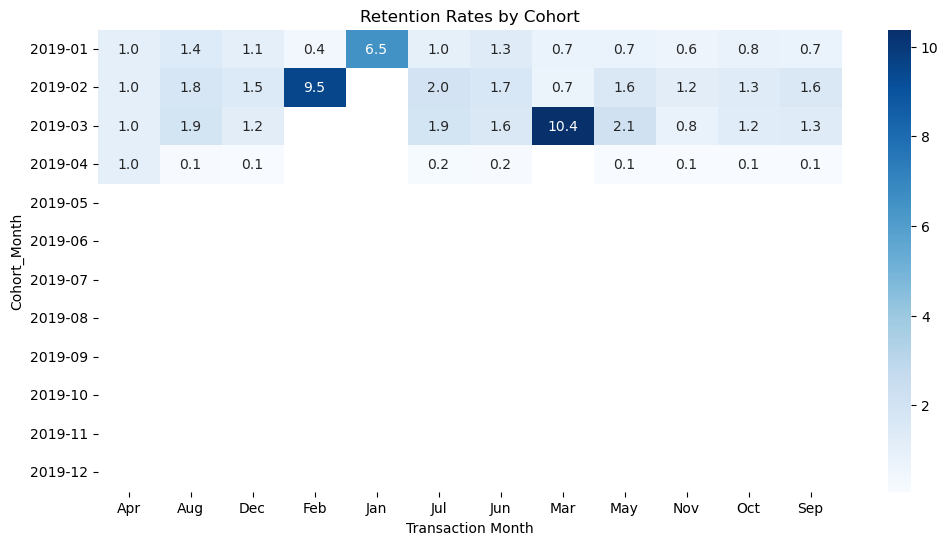

In [258]:

plt.figure(figsize=(12, 6))  
sns.heatmap(retention_rate, annot=True, fmt='.1f', cmap='Blues')  
plt.title('Retention Rates by Cohort')  
plt.ylabel('Cohort_Month')  
plt.xlabel('Transaction Month')  
plt.show()  

In [259]:
# Find the cohort with maximum retention 

max_retention = retention_rate.max().max()  
max_cohort = retention_rate.stack().idxmax()  
print(f"The maximum retention is {max_retention:.2f}% for the cohort from {max_cohort[0]} to {max_cohort[1]}.")  

The maximum retention is 10.38% for the cohort from 2019-03 to Mar.
